## CME538 GROUP PROJECT
TTC SUBWAY, TTC BUS AND OC-TRANSPO EXPLORATORY DATA ANALYSIS


### Set up Notebook

In [1]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [2]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")

C:\Users\diana\AppData\Local\Temp\ipykernel_5644\163543327.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ttc_bus_df = pd.read_csv("ttc_bus_df.csv")


## TTC SUBWAY

In [3]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


### Outliers

In [3]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]


In [4]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,102486.000000,102486.000000,102486.000000,102486.00000
mean,54011.082167,1.729475,3.081777,3530.84354
std,31069.249287,2.529287,4.378530,2654.52430
min,0.000000,0.000000,0.000000,0.00000
25%,27281.250000,0.000000,0.000000,0.00000
50%,53817.500000,0.000000,0.000000,5167.00000
75%,80963.750000,3.000000,7.000000,5646.00000
max,108003.000000,10.000000,27.000000,69021.00000


C:\Users\diana\AppData\Local\Temp\ipykernel_5644\1108744901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


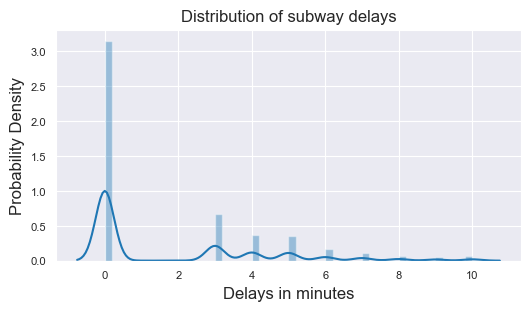

In [5]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [6]:
#Merge Date and Time Columns
ttc_subway_df['Datetime'] = pd.to_datetime(ttc_subway_df['Date']+' '+ ttc_subway_df['Time'])

#Drop Unnamed column
ttc_subway_df = ttc_subway_df.drop(['Unnamed: 0'], axis=1)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Datetime
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022-01-01 15:59:00
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022-01-01 02:23:00
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022-01-01 22:00:00
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022-01-01 02:28:00
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022-01-01 02:34:00


In [7]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102486 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       102486 non-null  object        
 1   Time       102486 non-null  object        
 2   Day        102486 non-null  object        
 3   Station    102486 non-null  object        
 4   Code       102486 non-null  object        
 5   Min Delay  102486 non-null  int64         
 6   Min Gap    102486 non-null  int64         
 7   Bound      73761 non-null   object        
 8   Line       102157 non-null  object        
 9   Vehicle    102486 non-null  int64         
 10  Datetime   102486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 9.4+ MB


### Time-based indexing

In [8]:
# Set the Date column as the index
ttc_subway_df.set_index('Datetime', inplace = True)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Datetime,,,,,,,,,,
2022-01-01 15:59:00,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01 02:23:00,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01 22:00:00,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01 02:28:00,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01 02:34:00,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [9]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df['hour'] = ttc_subway_df.index.hour

In [10]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       102486 non-null  object
 1   Time       102486 non-null  object
 2   Day        102486 non-null  object
 3   Station    102486 non-null  object
 4   Code       102486 non-null  object
 5   Min Delay  102486 non-null  int64 
 6   Min Gap    102486 non-null  int64 
 7   Bound      73761 non-null   object
 8   Line       102157 non-null  object
 9   Vehicle    102486 non-null  int64 
 10  year       102486 non-null  int32 
 11  month      102486 non-null  int32 
 12  month_day  102486 non-null  int32 
 13  hour       102486 non-null  int32 
dtypes: int32(4), int64(3), object(7)
memory usage: 10.2+ MB


In [12]:
non_numeric_columns = ttc_subway_df.select_dtypes(exclude ='number').columns
ttc_subway_df_numeric = ttc_subway_df.drop(columns= non_numeric_columns)
ttc_subway_df_numeric.head()

,Min Delay,Min Gap,Vehicle,year,month,month_day,hour
Datetime,,,,,,,
2022-01-01 15:59:00,0,0,3023,2022,1,1,15
2022-01-01 02:23:00,0,0,0,2022,1,1,2
2022-01-01 22:00:00,0,0,0,2022,1,1,22
2022-01-01 02:28:00,0,0,0,2022,1,1,2
2022-01-01 02:34:00,0,0,5981,2022,1,1,2


### Seasonal changes

In [13]:
#Plot Toronto Delay 
sns.set()  
plt.figure(figsize=(12,5))
sns.barplot(x=ttc_subway_df.index, y=ttc_subway_df['Min Delay'],errorbar= None)

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

KeyboardInterrupt: 

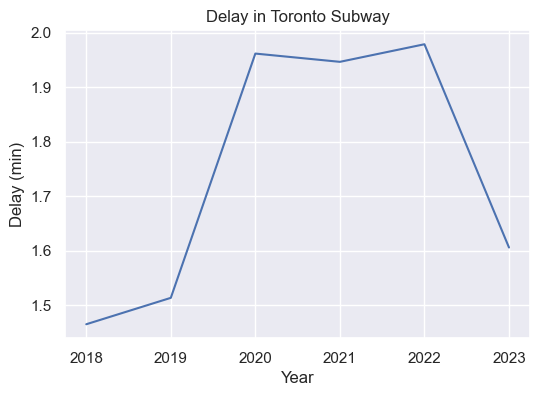

In [13]:
#Plot Toronto Delay by year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()



In [14]:
# Save the plot 
plt.savefig('1.Delay in Toronto Subway.jpg')

<Figure size 640x480 with 0 Axes>

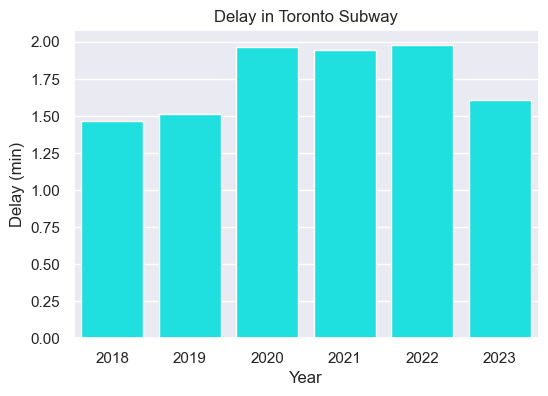

In [15]:
#Plot Toronto Delay by year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.barplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None, color= 'cyan')

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()

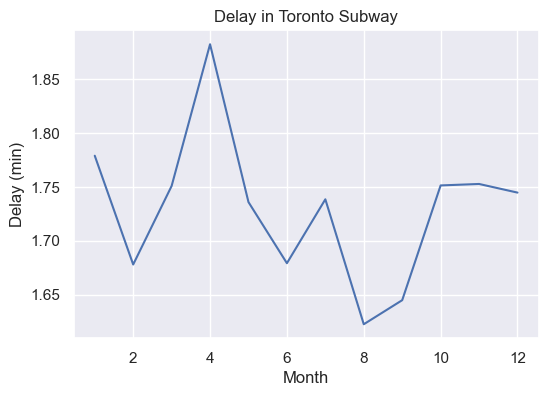

In [16]:
#Plot Toronto Delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

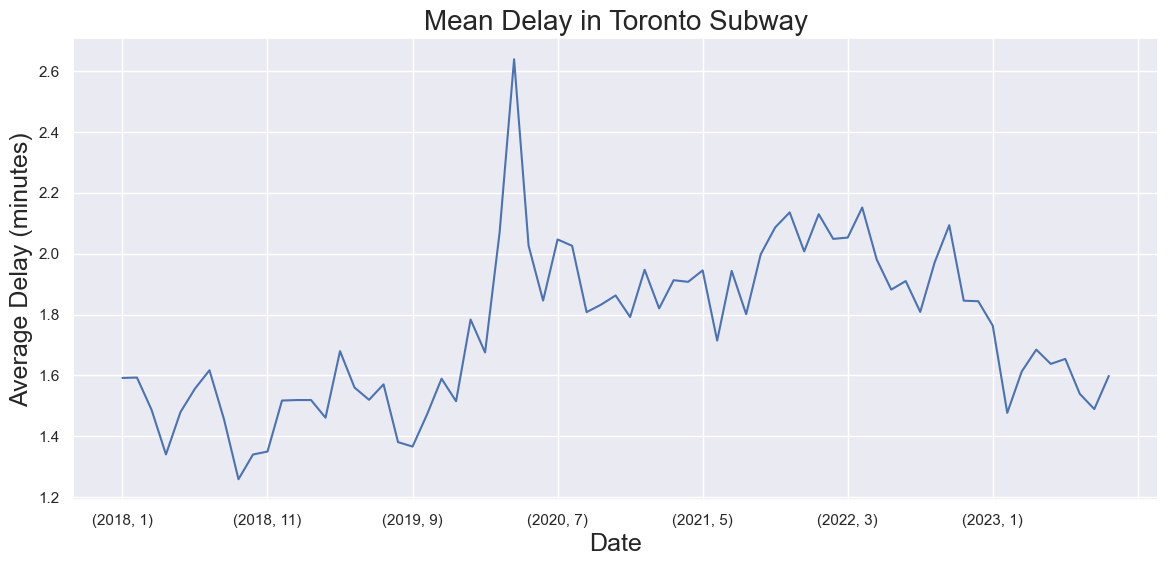

In [17]:
#Average Delay by month and year
plt.figure(figsize=(14, 6))
ax = ttc_subway_df.groupby(["year", "month"])["Min Delay"].mean().plot()
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
ax.set_title('Mean Delay in Toronto Subway', fontsize=20)

plt.show()

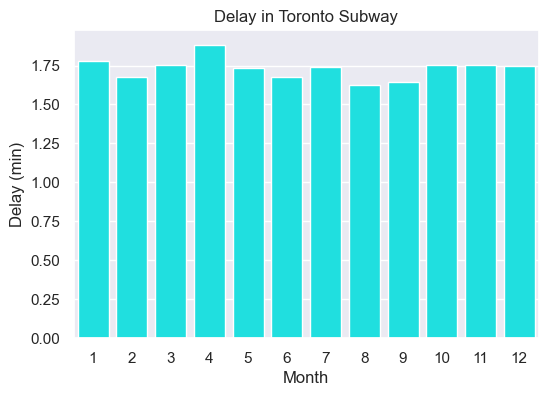

In [18]:
#Plot Toronto Delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.barplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None, color ='cyan')

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

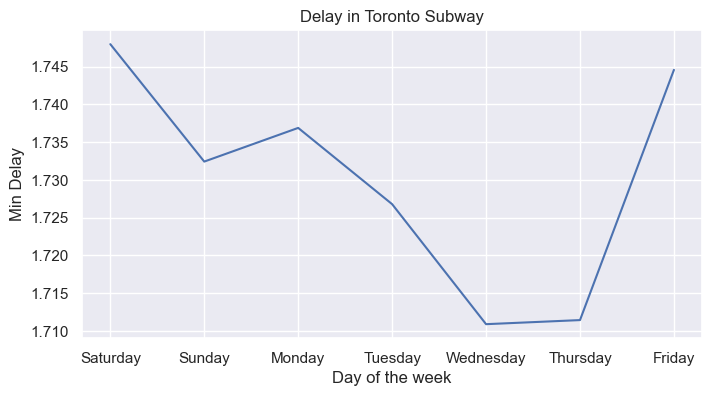

In [19]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

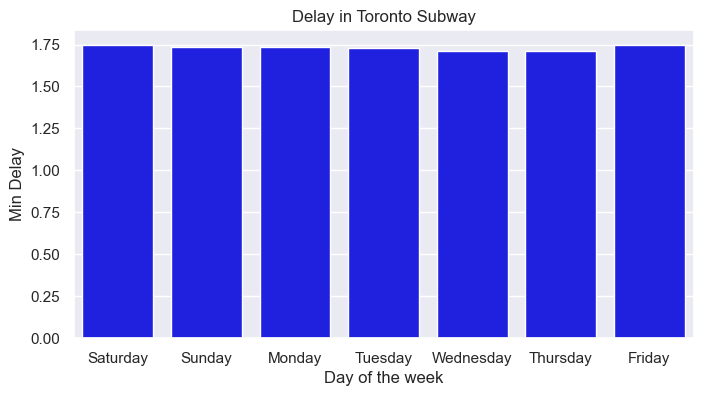

In [20]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.barplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None, color ='blue')

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

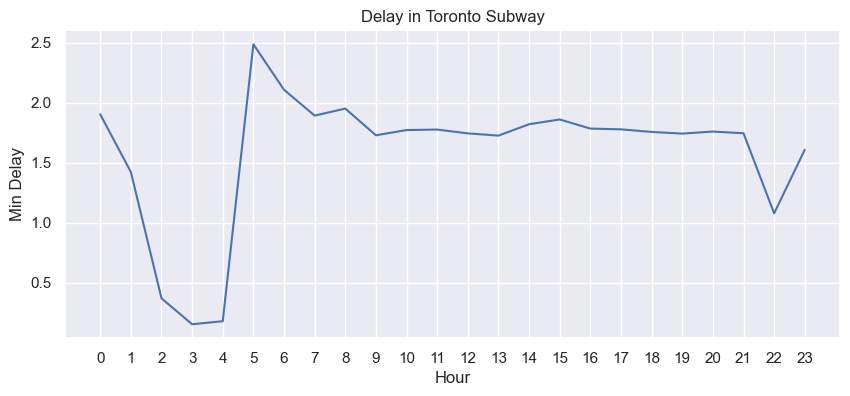

In [21]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['hour'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Hour', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.xticks(range(0, 24, 1))

plt.show()

In [ ]:
ttc_subway_df.describe()

### Peak and off-peak hours
Add a column to specify if it is a peak hour or not. 
According to the TTC peak hours are 6-9a.m and 3-7p.m

In [ ]:
#Add peak hours column
#Function to determine if a given datime is in peak hour

def is_peak_hour(dt):
    hour = dt.hour
    return 1 if ((6 <= hour <= 9) or (15 <= hour <= 19)) else 0

#Apply function to create a new column 'peakhour'

ttc_subway_df['peakhour'] = ttc_subway_df.index.to_series().apply(is_peak_hour)

ttc_subway_df.head()

In [ ]:
#Plot Toronto subway Delay by year with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

In [ ]:
#Plot Toronto subway Delay by month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

In [ ]:
#Plot Toronto subway Delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

In [ ]:
#Plot Toronto subway Delay by day of the month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

In [12]:
#Plot Toronto subway Delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

KeyError: 'peakhour'

<Figure size 600x400 with 0 Axes>

In [ ]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(10, 6))

# Barplot 
sns.barplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'], color='#FF00FF')
# Set labels and title
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()


### Seasons

In [ ]:
# Add seasons column
def get_season(month):
    if 3 <= month <=5:
        return 'Spring'
    elif 6<=month <=8:
        return 'Summer'
    elif 9<=month <=11:
        return 'Fall'
    else: 
        return 'Winter'

#Apply the function
ttc_subway_df['season'] = ttc_subway_df['month'].apply(get_season)

ttc_subway_df.tail()

In [ ]:
#Plot Toronto subway Delay by season with peak hours

sns.set()  
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

In [ ]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['season'], y=ttc_subway_df['Min Delay'],errorbar=None, color='#6A5ACD')

# Set labels 
plt.xlabel('Season', fontsize=12)
plt.title("Delay in Toronto Subway by season")

plt.show()

### Unique Values

In [ ]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



### Stations

In [ ]:
#Make a list of the unique "Station' values
unique_stations =  ttc_subway_df['Station'].unique()
print(unique_stations)
unique_stations_list = unique_stations.tolist()

In [ ]:
# Plot Toronto subway Delay stations
sns.set()  
plt.figure(figsize=(12,4))
sns.barplot(x=ttc_bus_df['Station'], y= ttc_bus_df['Min Delay'], color='#FF00FF')

# Set labels 
plt.xlabel('Station', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()

C:\Users\diana\AppData\Local\Temp\ipykernel_5644\98027137.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


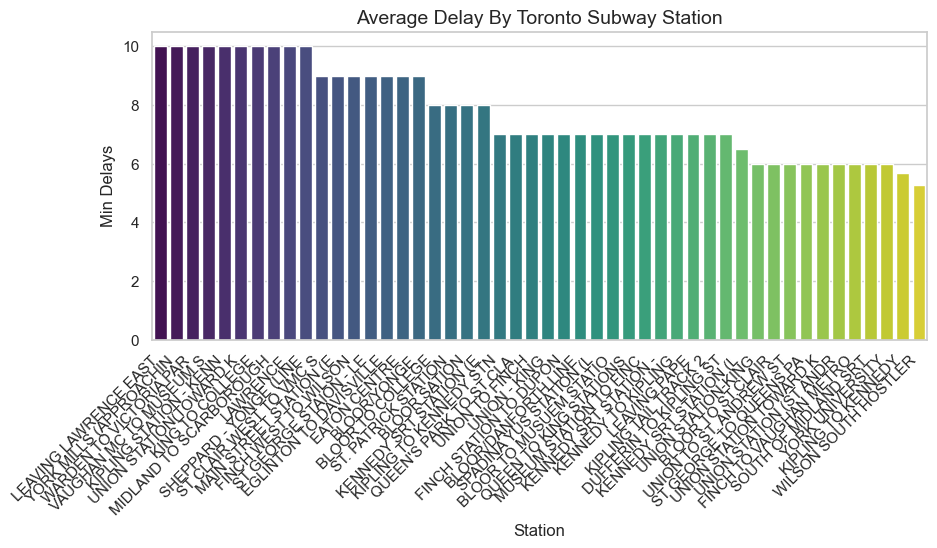

In [11]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_station = ttc_subway_df.groupby('Station')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station = ttc_subway_agg_station[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Station', y='Min Delay', data=ttc_subway_agg_sorted_station, palette='viridis', hue = 'Station', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Station', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Station', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_station = ttc_subway_df.groupby('Station')['Min Delay'].sum().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station = ttc_subway_agg_station.sort_values(by='Min Delay', ascending=True)

ttc_subway_agg_sorted_station.head(20)                                                                        

In [ ]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_station = ttc_subway_df.groupby('Station')['Min Delay'].count().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station = ttc_subway_agg_station.sort_values(by='Min Delay', ascending=True)

ttc_subway_agg_sorted_station.head()  

In [ ]:
ttc_subway_agg_sorted_station 

### MOST DELAYED STATION

In [57]:
#SUM OF DELAYS
ttc_subway_agg_station_sum = ttc_subway_df.groupby('Station')['Min Delay'].sum().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station_sum = ttc_subway_agg_station_sum[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)
ttc_subway_agg_sorted_station_sum 

,Station,Min Delay
699,WILSON SOUTH HOSTLER,37
678,WARDEN TO VICTORIA PAR,20
320,KIPLING TO KENNEDY,17
259,KENNEDY SRT STATION (E,16
273,KENNEDY TO KIPLING,14
260,KENNEDY SRT STATION (L,13
349,LEAVING LAWRENCE EAST,10
329,LAWRENCE,10
477,SHEPPARD - YONGE (LINE,10
306,KIPLING STATION - KENN,10


In [58]:
ttc_subway_agg_station_sum = ttc_subway_df.groupby('Station')['Min Delay'].sum().reset_index()
ttc_subway_agg_station_sum

,Station,Min Delay
0,1 TIPPETT ROAD,0
1,120 CARTWRIGHT AVE,0
2,40 CARL HALL ROAD UNIT,0
3,ALL OPEN CUTS,0
4,ALLEN ROAD AND EGLINTO,0
...,...,...
821,YUS AND BLOOR DANFORTH,0
822,YUS/ BD,0
823,YUS/BD,0
824,YUS/BD/SEPPARD SUBWAY,0


In [55]:
#SUM OF DELAYS
ttc_subway_agg_station_count = ttc_subway_df.groupby('Station')['Min Delay'].count().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station_count= ttc_subway_agg_station_count[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)
ttc_subway_agg_sorted_station_count

,Station,Min Delay
699,WILSON SOUTH HOSTLER,7
320,KIPLING TO KENNEDY,3
260,KENNEDY SRT STATION (L,2
273,KENNEDY TO KIPLING,2
678,WARDEN TO VICTORIA PAR,2
259,KENNEDY SRT STATION (E,2
447,QUEEN'S PARK TO ST CLA,1
477,SHEPPARD - YONGE (LINE,1
515,SOUTH OF MIDLAND SRT,1
528,SPADINA YUS STATION (L,1


In [56]:
# Plot Toronto subway Delay stations
sns.set()  
plt.figure(figsize=(12,4))
sns.barplot(x=ttc_bus_df['Line'], y= ttc_bus_df['Min Delay'], color='#FF00FF')

  
# Set labels 
plt.xlabel('Line', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()


KeyError: 'Line'

<Figure size 1200x400 with 0 Axes>

### Codes

In [34]:
#Make a list of the unique "Code' values
unique_codes =  ttc_subway_df['Code'].unique()
unique_codes_list = unique_codes.tolist()
print('list of codes:',unique_codes_list)

#Make a list of the unique "Bound' values
unique_bound =  ttc_subway_df['Bound'].unique()
unique_bound_list = unique_bound.tolist()
print('List of bound:',unique_bound_list)

#Make a list of the unique "Lines' values
unique_lines =  ttc_subway_df['Line'].unique()
unique_lines_list = unique_lines.tolist()
print('List of lines:',unique_lines_list)

list of codes: ['SRDP', 'MUIS', 'MRO', 'MUATC', 'MUNCA', 'TUATC', 'MUSC', 'TUNOA', 'TUO', 'SUO', 'PUOPO', 'MUIRS', 'MUIE', 'SUDP', 'SUUT', 'MUSAN', 'MUD', 'MUPR1', 'MUO', 'EUPI', 'TUMVS', 'MUI', 'TRNOA', 'SUAE', 'TRO', 'PUSSW', 'EUDO', 'PUMEL', 'SUAP', 'TUSC', 'PUMST', 'PUSAC', 'MUPAA', 'SUSA', 'PUSTS', 'PUSIS', 'ERDO', 'MRTO', 'EUYRD', 'EUSC', 'MUTO', 'TUNIP', 'TUOS', 'PUSO', 'ERCD', 'ERTC', 'TUCC', 'MUCL', 'SRSA', 'MUIR', 'EUNT', 'MRPAA', 'SUG', 'SUEAS', 'TUSUP', 'EUOE', 'MRNOA', 'PUMO', 'EUO', 'MUNOA', 'PUTD', 'MUPLC', 'PUSTC', 'ERRA', 'PRO', 'SUPOL', 'PUTO', 'SUROB', 'MRDD', 'EUCD', 'MUDD', 'TUS', 'MUTD', 'TRST', 'TUST', 'EUAC', 'MRUI', 'TUOPO', 'TUML', 'MRWEA', 'MRPLA', 'MUWEA', 'MUFM', 'PUTOE', 'PUTIS', 'PUEO', 'EUBK', 'EUTR', 'PUSRA', 'EUCA', 'MRIE', 'PUSI', 'PUSNT', 'PRSO', 'PUTR', 'ERLV', 'EUAL', 'PUTIJ', 'PRSL', 'TRTC', 'PUTWZ', 'EUBO', 'PUSZC', 'MUWR', 'MRCL', 'PUCSS', 'EUME', 'EUATC', 'MRSAN', 'PREL', 'ERBO', 'SRO', 'TUSET', 'SRUT', 'ERHV', 'ERO', 'MRPLB', 'TRNCA', 'PUTDN',

In [35]:
# Plot Toronto subway Delay codes
sns.set()  
plt.figure(figsize=(12,4))
sns.scatterplot(x=ttc_bus_df['Code'], y= ttc_bus_df['Min Delay'], color='#FF00FF')

# Set labels 
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delay', fontsize=12)
plt.title("Delay in Bus Subway")
plt.show()

KeyError: 'Code'

<Figure size 1200x400 with 0 Axes>

C:\Users\diana\AppData\Local\Temp\ipykernel_5644\2170951018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


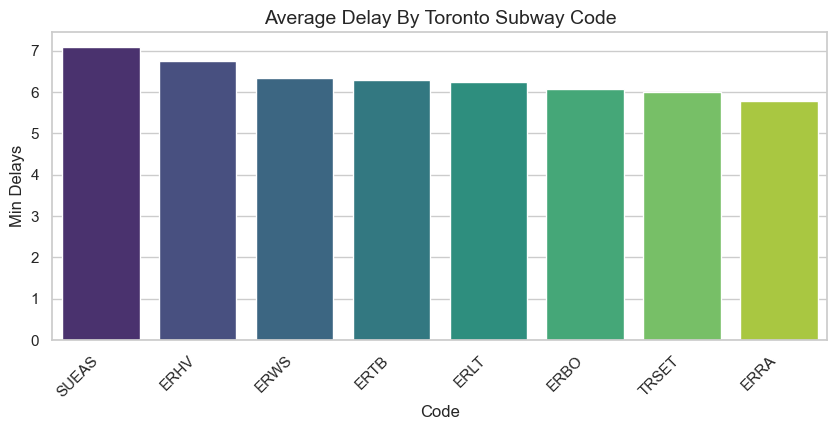

In [36]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_code = ttc_subway_df.groupby('Code')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_code = ttc_subway_agg_code[ttc_subway_agg_code['Min Delay'] > 5.7].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Code', y='Min Delay', data=ttc_subway_agg_sorted_code, palette='viridis', hue = 'Code', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Code', fontsize=14)

# Show the plot
plt.show()

In [ ]:
ttc_subway_agg_sorted_code.head()

In [ ]:
ttc_subway_agg_sorted_code['Code name'] = ttc_subway_agg_sorted_code['Code'].astype(str)

In [ ]:
ttc_subway_agg_sorted_code.head()

In [ ]:
mapping_dict = {SUEAS: 'One', 2: 'Two', 3: 'Three'}

# Use the map method to create a new column based on the mapping dictionary
ttc_subway_agg_sorted_code['MappedColumn'] = ttc_subway_agg_sorted_code['Column1'].map(mapping_dict)


In [ ]:
# Dictionary for string replacements
object_replacement_dict = {'SUEAS': 'Emergency Alarm Activation', 'ERHV': 'High Voltage',
                            'ERWS': 'Wind Shield', 'ERTB': 'Track Brakes', 'ERLT': 'Trainline System'}

# Function to replace each string 
def replace_strings_with_values(lst):
    return [object_replacement_dict.get(item, item) for item in lst]

# Apply the custom function to replace strings in the specified column
ttc_subway_agg_sorted_code['Code_name'] = ttc_subway_agg_sorted_code['Code'].apply(replace_strings_with_values)

print(ttc_subway_agg_sorted_code)

In [37]:
data = {'Code': ['Emergency Alarm Activation', 'High Voltage', 'Wind Shield','Track Brakes','Trainline System'], 'Min Delay': [7.095, 6.75, 6.33,6.28,6.25]}
df = pd.DataFrame(data)
df.head()

,Code,Min Delay
0,Emergency Alarm Activation,7.095
1,High Voltage,6.750
2,Wind Shield,6.330
3,Track Brakes,6.280
4,Trainline System,6.250


C:\Users\diana\AppData\Local\Temp\ipykernel_5644\4270423608.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


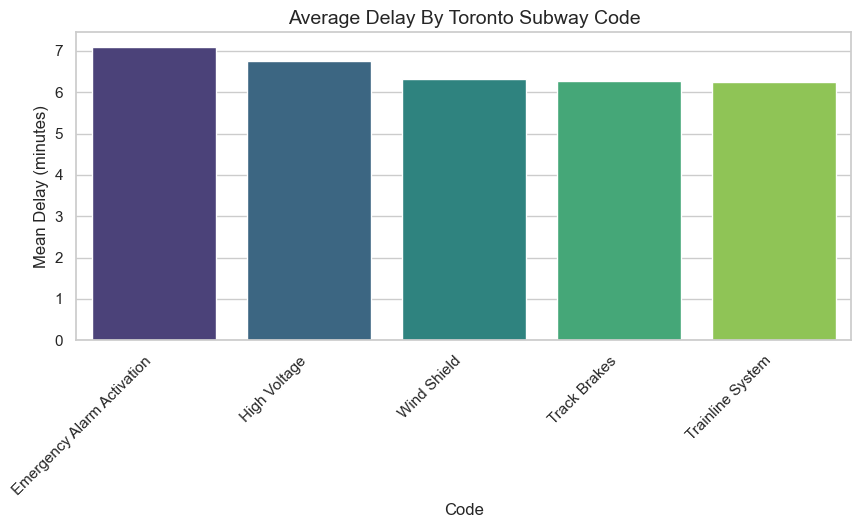

In [39]:

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Code', y='Min Delay', data=df, palette='viridis', hue = 'Code', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Code', fontsize=12)
plt.ylabel('Mean Delay (minutes)', fontsize=12)
plt.title('Average Delay By Toronto Subway Code', fontsize=14)

# Show the plot
plt.show()

### Line

In [ ]:
# Barplot of Min Delay and Line for TTC Subway
ttc_subway_df_agg = ttc_subway_df.groupby('Line')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_df_agg_sorted = ttc_subway_df_agg.sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Line', y='Min Delay', data=ttc_subway_df_agg_sorted, palette='viridis', hue = 'Line', legend= False)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Line', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay in Subway Lines', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Check for duplicates in Line column
duplicates = ttc_subway_df['Line'].duplicated()
print(ttc_subway_df[duplicates])

### Subway Correlation Analysis

In [ ]:
#Correlate ttc subway features
correlation  = ttc_subway_df_numeric.corr()
plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap of ttc subway features')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()


In [ ]:
#PLot correlations 
num_var = ['Min Delay','Min Gap','Vehicle','year','peakhour']
sns.pairplot(ttc_subway_df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

I calculated the total # of trips per day, then found the number of delayed trips per day and divided them (and then took reliability to be 1 - that percentage of delayed trips)

In [ ]:
#Of Trips per day
#delayed trips per day
#reliability 1- percentage of trips delay

#Calculate number of trips per day

ttc_subway_df

### Reliability


In [ ]:
ttc_subway_df

In [ ]:
ttcsubway_delay_perday = ttc_subway_df.groupby(["Date", "Day", "Line"]).count().reset_index()
ttcsubway_delay_perday.head()

## TTC BUS 

In [42]:
ttc_bus_df.head()


,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


In [43]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,313460.000000,307525.000000,312570.000000,286529.000000
mean,156729.500000,22.329710,33.748024,5528.746696
std,90488.252028,73.698228,74.520075,3763.471128
min,0.000000,-54.000000,0.000000,0.000000
25%,78364.750000,8.000000,16.000000,1648.000000
50%,156729.500000,10.000000,20.000000,7950.000000
75%,235094.250000,18.000000,34.000000,8583.000000
max,313459.000000,2030.000000,1890.000000,99035.000000


### Outliers

In [44]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1_bus= ttc_bus_df['Min Delay'].quantile(0.25)
Q3_bus= ttc_bus_df['Min Delay'].quantile(0.75)
IQR_bus =Q3_bus-Q1_bus

#Define the bounds for outlier removal
lower_bound_bus= Q1_bus-1.5*IQR
upper_bound_bus= Q3_bus +2*IQR

#Remove outliers by creating a mask
mask= (ttc_bus_df['Min Delay']<= upper_bound_bus)
ttc_bus_df = ttc_bus_df[mask]

# View DataFrame
ttc_bus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273312 entries, 0 to 313459
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   273312 non-null  int64  
 1   Report Date  273312 non-null  object 
 2   Route        272245 non-null  object 
 3   Time         273312 non-null  object 
 4   Day          273312 non-null  object 
 5   Location     273041 non-null  object 
 6   Incident     272409 non-null  object 
 7   Min Delay    273312 non-null  float64
 8   Min Gap      272846 non-null  float64
 9   Direction    245261 non-null  object 
 10  Vehicle      253212 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.0+ MB


In [45]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,273312.000000,273312.000000,272846.000000,253212.000000
mean,158422.872786,11.105755,21.738893,5555.980167
std,89284.517236,6.099669,15.559736,3762.173094
min,0.000000,-54.000000,0.000000,0.000000
25%,81791.750000,8.000000,14.000000,1658.000000
50%,157802.500000,10.000000,20.000000,7959.000000
75%,235745.250000,15.000000,30.000000,8602.000000
max,313459.000000,26.000000,999.000000,99035.000000


In [46]:
#Merge Date and Time Columns
ttc_bus_df['Datetime'] = pd.to_datetime(ttc_bus_df['Report Date'])
ttc_bus_df.head()

C:\Users\diana\AppData\Local\Temp\ipykernel_5644\37664598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['Datetime'] = pd.to_datetime(ttc_bus_df['Report Date'])


,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Datetime
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0,2018-01-01
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0,2018-01-01
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0,2018-01-01
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0,2018-01-01
5,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0,2018-01-01


In [47]:
# Set the datetime colum as the index
ttc_bus_df.set_index('Datetime', inplace = True)
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
Datetime,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0
2018-01-01,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0


In [48]:
# Add new columns 'year', 'month' and 'month_day' that indicate the year, month and day associated with each observation

ttc_bus_df['year'] = ttc_bus_df.index.year
ttc_bus_df['month'] = ttc_bus_df.index.month
ttc_bus_df['month_day'] = ttc_bus_df.index.day
ttc_bus_df['hour'] = ttc_bus_df.index.hour

C:\Users\diana\AppData\Local\Temp\ipykernel_5644\1476808294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['year'] = ttc_bus_df.index.year
C:\Users\diana\AppData\Local\Temp\ipykernel_5644\1476808294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['month'] = ttc_bus_df.index.month
C:\Users\diana\AppData\Local\Temp\ipykernel_5644\1476808294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

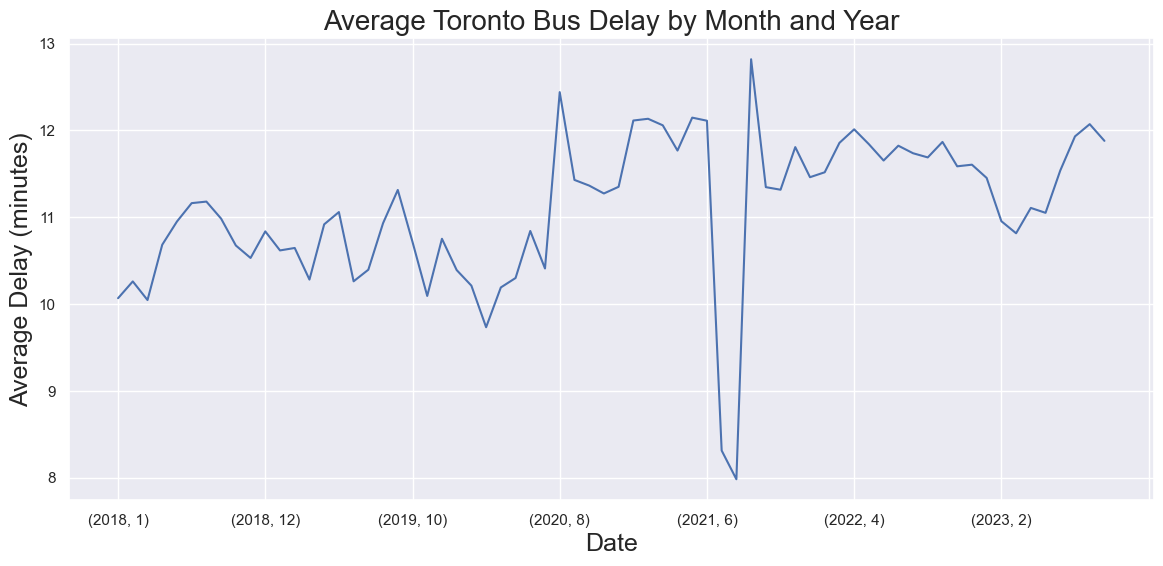

In [49]:
#Average Delay by month and year
plt.figure(figsize=(14, 6))
ax = ttc_bus_df.groupby(["year", "month"])["Min Delay"].mean().plot()

# Set the background color to white
ax.figure.set_facecolor('white')
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
ax.set_title('Average Toronto Bus Delay by Month and Year', fontsize=20)

plt.show()


In [50]:
#Average Delay by month and year
plt.figure(figsize=(14, 6))
ax = ttc_bus_df.["Min Delay"].mean().plot()

# Set the background color to white
ax.figure.set_facecolor('white')
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
ax.set_title('Average Toronto Bus Delay by Month and Year', fontsize=20)

plt.show()

SyntaxError: invalid syntax (4049415450.py, line 3)

In [51]:
# Plot Toronto bus Delay by day of the week with peak hours

sns.set()  
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df.groupby(["year", "month"]).mean().reset_index()['month'], 
             y=ttc_bus_df.groupby(["year", "month"])["Min Delay"].mean(), 
             label='Bus', color='#FF00FF')

sns.lineplot(x=ttc_subway_df.groupby(["year", "month"]).mean().reset_index()['month'], 
             y=ttc_subway_df.groupby(["year", "month"])["Min Delay"].mean(), 
             label='Subway', color='#00FFFF')

# Set labels and title
plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Delay (minutes)', fontsize=18)
plt.title('Average Toronto Bus and Subway Delay by Month and Year', fontsize=20)

plt.show()

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 600x300 with 0 Axes>

### Peak hours

In [ ]:
#Add peak hours column
#Apply function to create a new column 'peakhour'
ttc_bus_df['peakhour'] = ttc_bus_df.index.to_series().apply(is_peak_hour)

ttc_bus_df.head()

In [ ]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()

In [ ]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(10, 4))

# Filter data for peak and off-peak hours
peak_hours_data = ttc_bus_df[ttc_bus_df['peakhour'] == 1]
off_peak_hours_data = ttc_bus_df[ttc_bus_df['peakhour'] == 0]

# Barplot for Peak Hours
sns.barplot(x=peak_hours_data['Day'], y=peak_hours_data['Min Delay'], color='#FF00FF', label='Peak Hours')

# Barplot for Off-peak Hours
sns.barplot(x=off_peak_hours_data['Day'], y=off_peak_hours_data['Min Delay'], color='#00FFFF', label='Off-peak Hours')

# Set labels and title
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

# Show the legend
plt.legend()

plt.show()


### Season

In [ ]:
#Apply the function
ttc_bus_df['season'] = ttc_bus_df['month'].apply(get_season)

In [ ]:
# Plot Toronto bus Delay by season with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()


### Incident


In [52]:
ttc_bus_df

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,year,month,month_day,hour
Datetime,,,,,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0,2018,1,1,0
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0,2018,1,1,0
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0,2018,1,1,0
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0,2018,1,1,0
2018-01-01,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,313455,2023-09-30,41,23:45,Saturday,KEELE STATION,Mechanical,22.0,44.0,NaN,1420.0,2023,9,30,0
2023-09-30,313456,2023-09-30,121,23:55,Saturday,103 LOWER JARVIS ST,Operations - Operator,20.0,40.0,E,8577.0,2023,9,30,0
2023-09-30,313457,2023-09-30,52,00:29,Saturday,THE WESTWAY AND KIPLIN,Emergency Services,23.0,46.0,W,3576.0,2023,9,30,0


C:\Users\diana\AppData\Local\Temp\ipykernel_5644\538156611.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


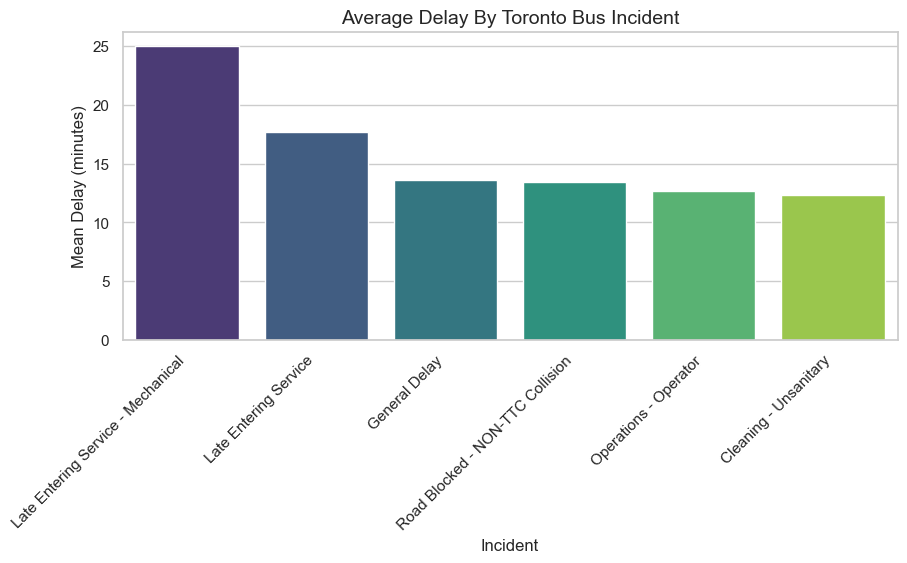

In [54]:
# Barplot of Min Delay and Code for TTC Subway
ttc_bus_agg_code = ttc_bus_df.groupby('Incident')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_bus_agg_sorted_code = ttc_bus_agg_code[ttc_bus_agg_code['Min Delay'] > 12].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Incident', y='Min Delay', data=ttc_bus_agg_sorted_code, palette='viridis', hue = 'Incident', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Incident', fontsize=12)
plt.ylabel('Mean Delay (minutes)', fontsize=12)
plt.title('Average Delay By Toronto Bus Incident', fontsize=14)

# Show the plot
plt.show()

## Mode of Transportation comparison

In [ ]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['Day'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0
#plt.ylim(0, 3.5)
plt.show()

In [ ]:
ttc_subway_df.info()

In [ ]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('month', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0

plt.show()


## TORONTO WEATHER

In [22]:
toronto_weather = pd.read_csv("toronto_weather_simplified.csv")
toronto_weather.head(10)

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),...,Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01,2019,1,1,6.1,...,NaN,0.0,NaN,0.4,NaN,NaN,29.0,NaN,55.0,NaN
1,1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-02,2019,1,2,0.4,...,NaN,0.0,NaN,2.1,NaN,NaN,NaN,M,NaN,M
2,2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-03,2019,1,3,1.8,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,48.0,NaN
3,3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-04,2019,1,4,6.6,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,41.0,NaN
4,4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-05,2019,1,5,3.6,...,NaN,0.0,NaN,0.0,NaN,NaN,23.0,NaN,39.0,NaN
5,5,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-06,2019,1,6,5.0,...,NaN,0.0,NaN,0.0,NaN,NaN,32.0,NaN,52.0,NaN
6,6,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-07,2019,1,7,5.2,...,NaN,0.0,NaN,2.7,NaN,NaN,8.0,NaN,63.0,NaN
7,7,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-08,2019,1,8,8.7,...,NaN,0.0,NaN,3.8,NaN,NaN,22.0,NaN,41.0,NaN
8,8,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-09,2019,1,9,3.4,...,NaN,0.0,NaN,0.2,NaN,NaN,28.0,NaN,67.0,NaN
9,9,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-10,2019,1,10,-3.3,...,NaN,0.0,NaN,0.0,NaN,NaN,31.0,NaN,61.0,NaN


In [23]:
toronto_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1826 non-null   int64  
 1   Longitude (x)              1826 non-null   float64
 2   Latitude (y)               1826 non-null   float64
 3   Station Name               1826 non-null   object 
 4   Climate ID                 1826 non-null   int64  
 5   Date/Time                  1826 non-null   object 
 6   Year                       1826 non-null   int64  
 7   Month                      1826 non-null   int64  
 8   Day                        1826 non-null   int64  
 9   Max Temp (°C)              1736 non-null   float64
 10  Max Temp Flag              59 non-null     object 
 11  Min Temp (°C)              1736 non-null   float64
 12  Min Temp Flag              59 non-null     object 
 13  Mean Temp (°C)             1736 non-null   float

In [24]:
#Drop undesired columns
columns_to_drop = ['Unnamed: 0','Climate ID','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                   'Heat Deg Days Flag','Cool Deg Days Flag','Total Precip Flag','Snow on Grnd (cm)']
toronto_weather = toronto_weather.drop(columns=columns_to_drop)
toronto_weather.head()

,Longitude (x),Latitude (y),Station Name,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.63,TORONTO CITY CENTRE,2019-01-01,2019,1,1,6.1,-6.7,-0.3,18.3,0.0,0.4,29.0,NaN,55.0,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,2019-01-02,2019,1,2,0.4,-7.9,-3.8,21.8,0.0,2.1,NaN,M,NaN,M
2,-79.4,43.63,TORONTO CITY CENTRE,2019-01-03,2019,1,3,1.8,-0.4,0.7,17.3,0.0,0.0,24.0,NaN,48.0,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,2019-01-04,2019,1,4,6.6,1.5,4.1,13.9,0.0,0.0,24.0,NaN,41.0,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,2019-01-05,2019,1,5,3.6,1.2,2.4,15.6,0.0,0.0,23.0,NaN,39.0,NaN


In [25]:
toronto_weather.describe()

,Longitude (x),Latitude (y),Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
count,1.826000e+03,1826.00,1826.000000,1826.000000,1826.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1759.000000,1462.000000,1462.000000
mean,-7.940000e+01,43.63,2020.999452,6.523549,15.727820,13.028111,5.953514,9.507949,9.404263,0.912212,1.982149,20.675103,48.372093
std,2.842950e-14,0.00,1.414407,3.449478,8.801735,9.995527,9.269847,9.533541,8.381935,1.861269,5.167422,10.594275,12.766089
min,-7.940000e+01,43.63,2019.000000,1.000000,1.000000,-13.600000,-21.000000,-17.300000,0.000000,0.000000,0.000000,1.000000,32.000000
25%,-7.940000e+01,43.63,2020.000000,4.000000,8.000000,4.600000,-0.625000,2.100000,0.000000,0.000000,0.000000,7.000000,39.000000
50%,-7.940000e+01,43.63,2021.000000,7.000000,16.000000,12.300000,5.500000,8.800000,9.200000,0.000000,0.000000,24.000000,46.000000
75%,-7.940000e+01,43.63,2022.000000,10.000000,23.000000,22.325000,14.500000,18.425000,15.900000,0.425000,1.000000,30.000000,55.000000
max,-7.940000e+01,43.63,2023.000000,12.000000,31.000000,34.900000,24.000000,29.300000,35.300000,11.300000,60.400000,36.000000,118.000000


In [26]:
#Merge Date and Time Columns
toronto_weather['Datetime'] = pd.to_datetime(toronto_weather['Date/Time'])

# Set the datetime colum as the index
toronto_weather.set_index('Datetime', inplace = True)
toronto_weather.head()

,Longitude (x),Latitude (y),Station Name,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Datetime,,,,,,,,,,,,,,,,,
2019-01-01,-79.4,43.63,TORONTO CITY CENTRE,2019-01-01,2019,1,1,6.1,-6.7,-0.3,18.3,0.0,0.4,29.0,NaN,55.0,NaN
2019-01-02,-79.4,43.63,TORONTO CITY CENTRE,2019-01-02,2019,1,2,0.4,-7.9,-3.8,21.8,0.0,2.1,NaN,M,NaN,M
2019-01-03,-79.4,43.63,TORONTO CITY CENTRE,2019-01-03,2019,1,3,1.8,-0.4,0.7,17.3,0.0,0.0,24.0,NaN,48.0,NaN
2019-01-04,-79.4,43.63,TORONTO CITY CENTRE,2019-01-04,2019,1,4,6.6,1.5,4.1,13.9,0.0,0.0,24.0,NaN,41.0,NaN
2019-01-05,-79.4,43.63,TORONTO CITY CENTRE,2019-01-05,2019,1,5,3.6,1.2,2.4,15.6,0.0,0.0,23.0,NaN,39.0,NaN


In [27]:
# Establish the desired format for the Datetime column
date_format = "%Y-%m-%d"  # Adjust the format as needed

# Apply the format to the Datetime column
toronto_weather['FormattedDatetime'] = toronto_weather.index.strftime(date_format)

# Display the DataFrame
toronto_weather.head()

,Longitude (x),Latitude (y),Station Name,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,FormattedDatetime
Datetime,,,,,,,,,,,,,,,,,,
2019-01-01,-79.4,43.63,TORONTO CITY CENTRE,2019-01-01,2019,1,1,6.1,-6.7,-0.3,18.3,0.0,0.4,29.0,NaN,55.0,NaN,2019-01-01
2019-01-02,-79.4,43.63,TORONTO CITY CENTRE,2019-01-02,2019,1,2,0.4,-7.9,-3.8,21.8,0.0,2.1,NaN,M,NaN,M,2019-01-02
2019-01-03,-79.4,43.63,TORONTO CITY CENTRE,2019-01-03,2019,1,3,1.8,-0.4,0.7,17.3,0.0,0.0,24.0,NaN,48.0,NaN,2019-01-03
2019-01-04,-79.4,43.63,TORONTO CITY CENTRE,2019-01-04,2019,1,4,6.6,1.5,4.1,13.9,0.0,0.0,24.0,NaN,41.0,NaN,2019-01-04
2019-01-05,-79.4,43.63,TORONTO CITY CENTRE,2019-01-05,2019,1,5,3.6,1.2,2.4,15.6,0.0,0.0,23.0,NaN,39.0,NaN,2019-01-05


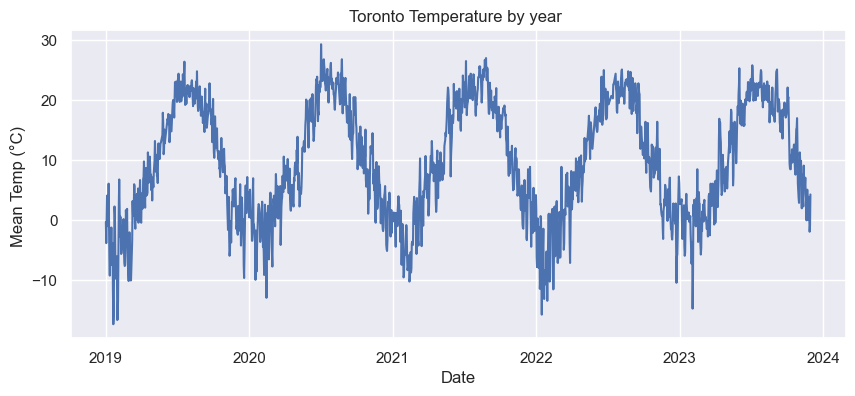

In [28]:
#Plot Toronto Temperature by year 
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=toronto_weather.index, y=toronto_weather['Mean Temp (°C)'],errorbar=None)

# Set labels 
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temp (°C) ', fontsize=12)
plt.title("Toronto Temperature by year ")

plt.show()

In [29]:
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour
Datetime,,,,,,,,,,,,,,
2022-01-01 15:59:00,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15
2022-01-01 02:23:00,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2
2022-01-01 22:00:00,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22
2022-01-01 02:28:00,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2
2022-01-01 02:34:00,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2


### Mean temperature

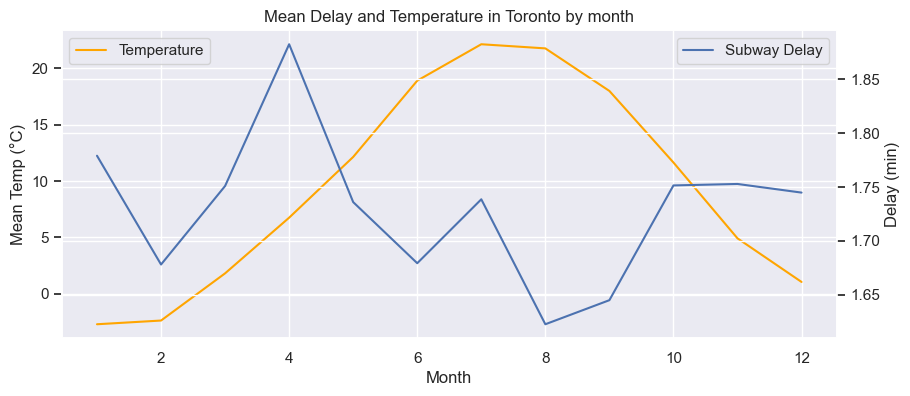

In [32]:
# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Mean Temp (°C)'], ax=ax1,color='orange', label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

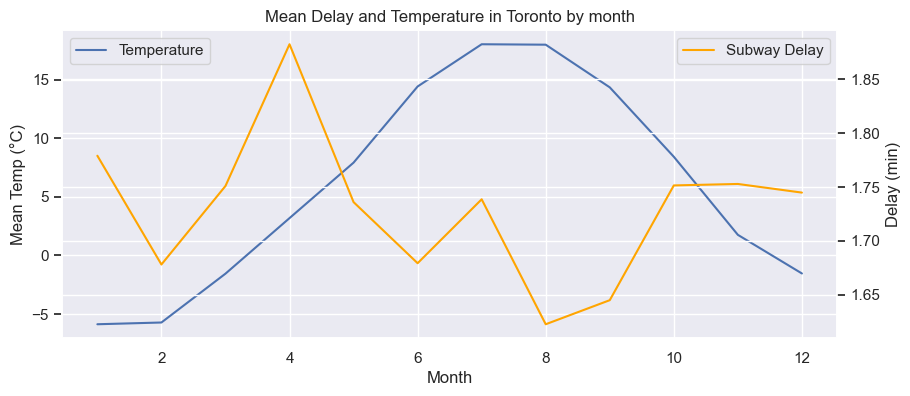

In [21]:
# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Min Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

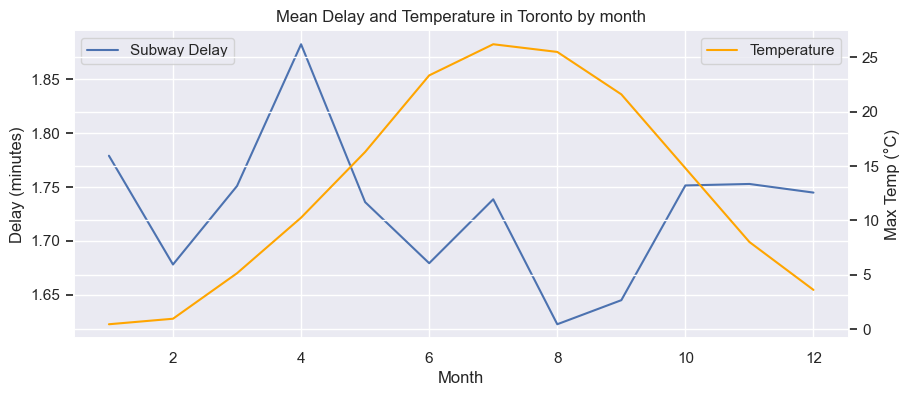

In [41]:
# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax1, label='Subway Delay',errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Delay (minutes)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Max Temp (°C)'], ax=ax2, color='orange', label='Temperature', errorbar=None)
ax2.set_ylabel('Max Temp (°C)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

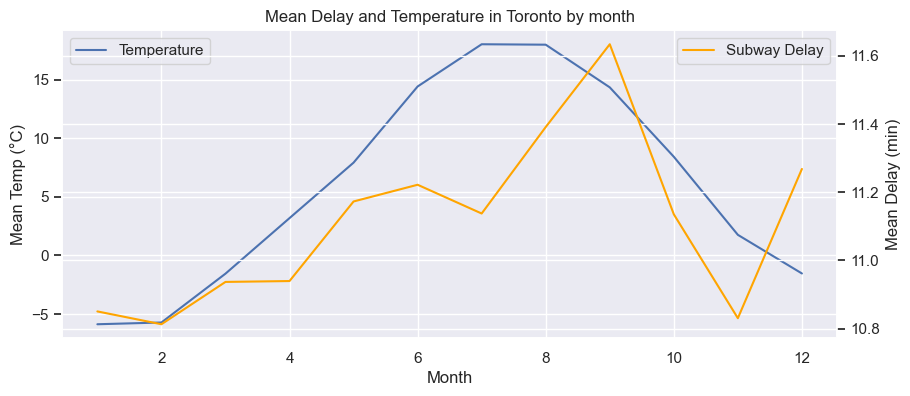

In [33]:
# Plot Toronto BUSES Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Min Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Mean Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

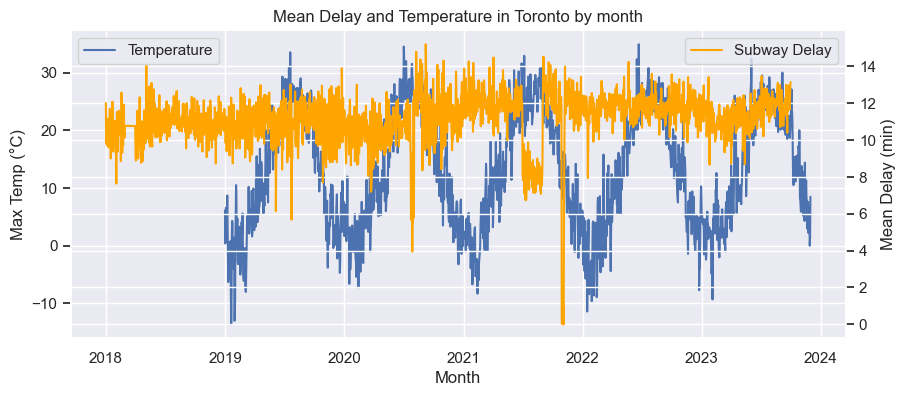

In [34]:
# Plot Toronto BUSES Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather.index, y=toronto_weather['Max Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Max Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_bus_df.index, y=ttc_bus_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Mean Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

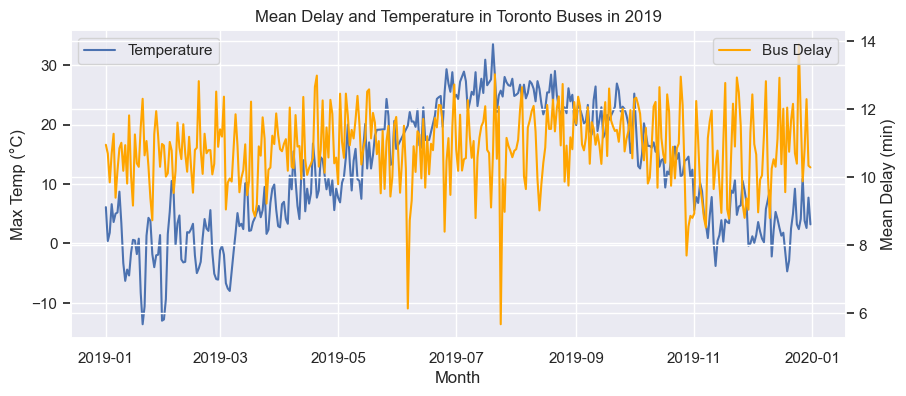

In [35]:
# Filter data for the year 2019
toronto_weather_2019 = toronto_weather[toronto_weather.index.year == 2019]
ttc_bus_df_2019 = ttc_bus_df[ttc_bus_df.index.year == 2019]

# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather_2019.index, y=toronto_weather_2019['Max Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Max Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto Buses in 2019")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Bus Delay by month on the second y-axis
sns.lineplot(x=ttc_bus_df_2019.index, y=ttc_bus_df_2019['Min Delay'], ax=ax2, color='orange', label='Bus Delay', errorbar=None)
ax2.set_ylabel('Mean Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
toronto_weather.head()


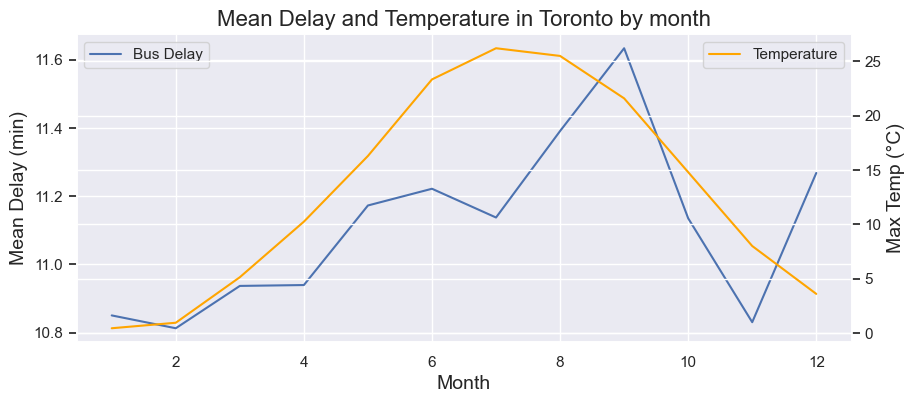

In [44]:
# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'], ax=ax1, label='Bus Delay',errorbar=None)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Mean Delay (min)', fontsize=14)
ax1.set_title("Mean Delay and Temperature in Toronto by month", fontsize=16)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Max Temp (°C)'], ax=ax2,color='orange', label='Temperature', errorbar=None)
ax2.set_ylabel('Max Temp (°C)', fontsize=14)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# Filter data for 2019
toronto_weather_2019 = toronto_weather[(toronto_weather.index >='2019-01-01') &(toronto_weather.index <='2019-12-31')]
ttc_subway_df_2019 = ttc_subway_df[(ttc_subway_df.index >='2019-01-01') &(ttc_subway_df.index <='2019-12-31')]


In [ ]:
ttc_subway_df_2019.head()

In [ ]:
# Plot Toronto Subway and Mean Temp (C)
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))
sns.lineplot(x=toronto_weather_2019.index, y=toronto_weather_2019['Mean Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Toronto Temperature and Subway Delay")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df_2019_down.indexb, y=ttc_subway_df_2019_down['Min Delay'], ax=ax2, color='orange', label='Subway Delay', errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# Plot Toronto total Precip (mm) by year
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Total Precip (mm)'], ax=ax1, label='Total precipitation', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total precipitation (mm)', fontsize=12)
ax1.set_title("Toronto precipitation and Subway Delay")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axesb
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
sns.set(style="whitegrid")  # Optional: Set a style for the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ttc_subway_df['Min Delay'], y=ttc_subway_df['Line'], data=toronto_weather, color='blue', marker='o', s=100)

# Set labels and title
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Scatter', fontsize=14)

# Show the plot
plt.show()